In this notebook, I develop several visuals that are used in the lecture notes.

### 1. Gradient Clipping Visual

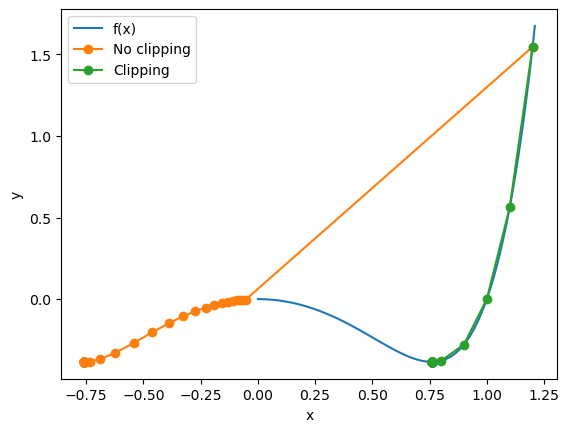

In [58]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function to optimize
def f(x):
    return x**6 - x**2

def df(x):
    return 6*x**5 - 2*x

def gradient_descent(f, x0, alpha=0.1, n_iter=100, clip_norm=None):
    """Gradient descent algorithm."""
    x = x0
    x_history = []
    for i in range(n_iter):
        x_history.append(x)
        if clip_norm is not None:
            norm = np.linalg.norm(df(x))
            if norm > clip_norm:
                x -= alpha * df(x) / norm * clip_norm
            else:
                x -= alpha * df(x)
        else:
            x -= alpha * df(x)
    return x_history

# Run gradient descent with and without clipping and plot the results
x0 = 1.2
x_history = gradient_descent(f, x0, alpha=0.1, n_iter=100)
x_history_clipped = gradient_descent(f, x0, alpha=0.1, n_iter=100, clip_norm=1)

# At each point of the trajectory, plot the gradient vector
x = np.linspace(0, 1.21, 100)
y = f(x)
plt.plot(x, y)
plt.plot(x_history, f(np.array(x_history)), 'o-')
plt.plot(x_history_clipped, f(np.array(x_history_clipped)), 'o-')
plt.legend(['f(x)', 'No clipping', 'Clipping'])
plt.xlabel('x')
plt.ylabel('y')
plt.show()


### 2. Gradient Descent with Momentum Visual

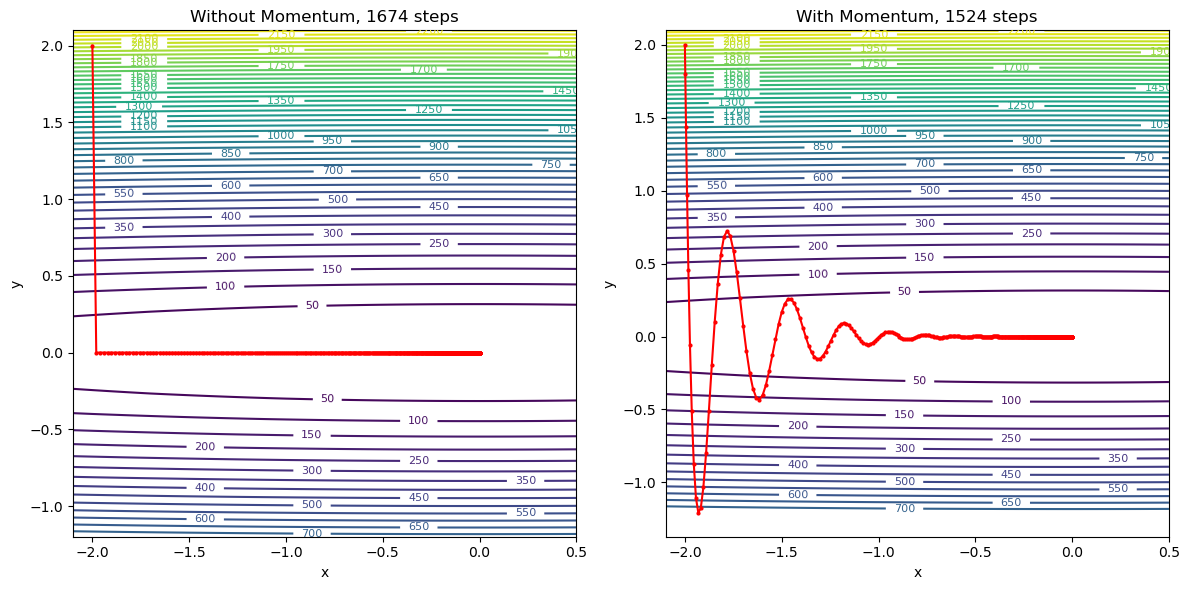

In [136]:
# Define the function and its gradient
def f(x, y, a=10, b=1000):
    return 1/2 * (a*x**2 + b*y**2)

def df(x, y, a=10, b=1000):
    return np.array([a*x, b*y])

# Initialize parameters for the gradient descent
params = np.array([-2.0, 2.0])  # Starting point for the descent
learning_rate = 1/1000  # Learning rate
momentum = 0.9  # Momentum factor

# Lists to store the paths of the descent
path_without_momentum = [params]
path_with_momentum = [params]

# Simulate gradient descent without momentum
eps = 1e-6
error = 1
n_steps_without_momentum = 0
while error > eps:
    grad = df(params[0], params[1])
    params = params - learning_rate * grad
    path_without_momentum.append(params.copy())
    error = np.linalg.norm(grad)
    n_steps_without_momentum += 1

# Reset the parameters for the descent with momentum
params = np.array([-2.0, 2.0])
velocity = np.array([0, 0])

# Simulate gradient descent with momentum
eps = 1e-6
error = 1
n_steps_with_momentum = 0
while error > eps:
    grad = df(params[0], params[1])
    velocity = momentum * velocity + (1-momentum) * grad
    params = params - learning_rate * velocity
    path_with_momentum.append(params.copy())
    error = np.linalg.norm(velocity)
    n_steps_with_momentum += 1

# Convert the paths to arrays for easier plotting
path_without_momentum = np.array(path_without_momentum)
path_with_momentum = np.array(path_with_momentum)

# Create a grid of points for the contour plot
x_values = np.linspace(-2.1, 0.5, 100)
y_values = np.linspace(-1.2, 2.1, 100)
x_grid, y_grid = np.meshgrid(x_values, y_values)
z_grid = f(x_grid, y_grid)

# Plot the contour plot and the paths
plt.figure(figsize=(12, 6))

# Without Momentum
plt.subplot(1, 2, 1)
contours = plt.contour(x_grid, y_grid, z_grid, levels=50, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(path_without_momentum[:, 0], path_without_momentum[:, 1], 'r-o', label='Path without Momentum', markersize=2)
plt.title('Without Momentum, {} steps'.format(n_steps_without_momentum))
plt.xlabel('x')
plt.ylabel('y')

# With Momentum
plt.subplot(1, 2, 2)
contours = plt.contour(x_grid, y_grid, z_grid, levels=50, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(path_with_momentum[:, 0], path_with_momentum[:, 1], 'r-o', label='Path with Momentum', markersize=2)
plt.title('With Momentum, {} steps'.format(n_steps_with_momentum))
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()

### 3. Same example, Nesterov Momentum Visual

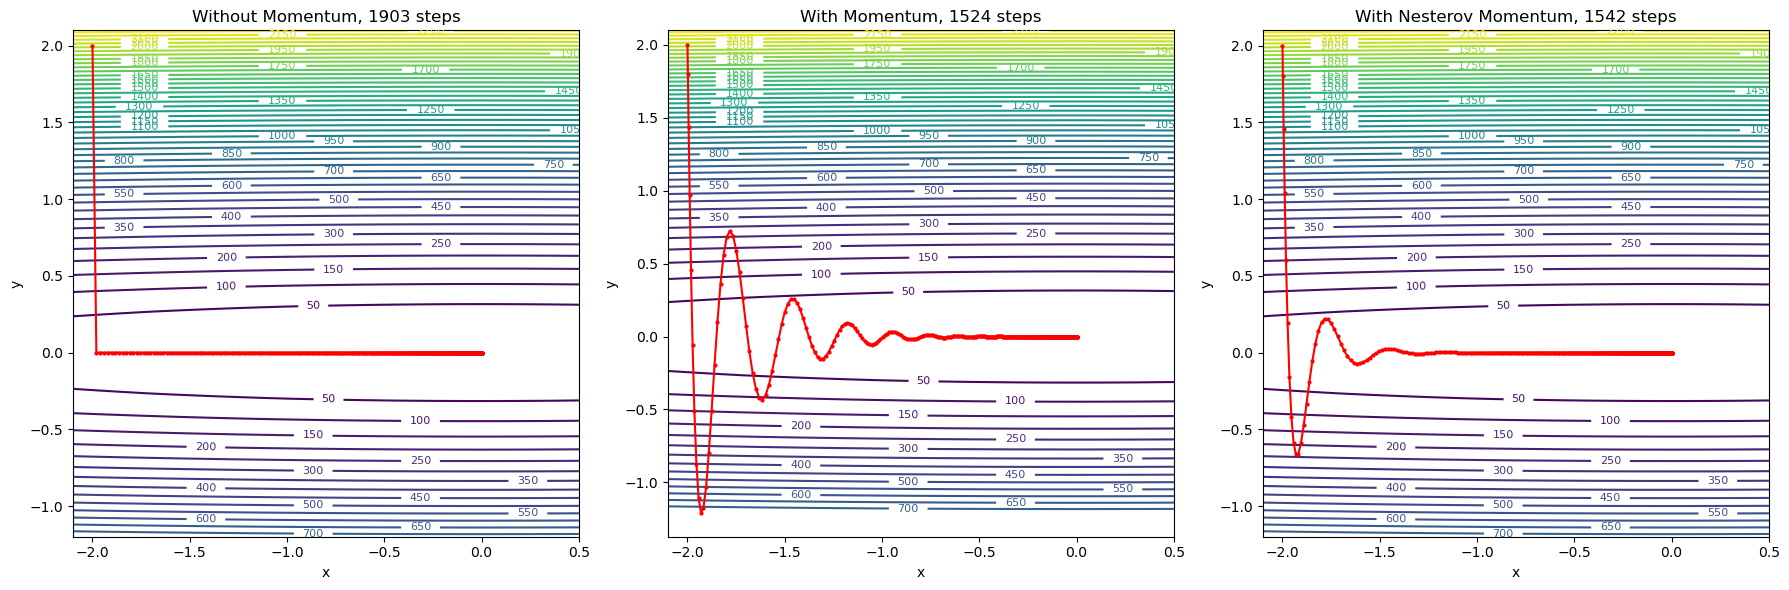

In [146]:
# Define the function and its gradient
def f(x, y, a=10, b=1000):
    return 1/2 * (a*x**2 + b*y**2)

def df(x, y, a=10, b=1000):
    return np.array([a*x, b*y])

# Initialize parameters for the gradient descent
params = np.array([-2.0, 2.0])  # Starting point for the descent
learning_rate = 1/1000  # Learning rate
momentum = 0.9  # Momentum factor

# Lists to store the paths of the descent
path_without_momentum = [params]
path_with_momentum = [params]
path_with_nesterov_momentum = [params]

# Simulate gradient descent without momentum
eps = 1e-7
error = 1
n_steps_without_momentum = 0
while error > eps:
    grad = df(params[0], params[1])
    params = params - learning_rate * grad
    path_without_momentum.append(params.copy())
    error = np.linalg.norm(grad)
    n_steps_without_momentum += 1

# Reset the parameters for the descent with momentum
params = np.array([-2.0, 2.0])
velocity = np.array([0, 0])

# Simulate gradient descent with momentum
eps = 1e-6
error = 1
n_steps_with_momentum = 0
while error > eps:
    grad = df(params[0], params[1])
    velocity = momentum * velocity + (1-momentum) * grad
    params = params - learning_rate * velocity
    path_with_momentum.append(params.copy())
    error = np.linalg.norm(velocity)
    n_steps_with_momentum += 1

# Reset the parameters for the descent with Nesterov momentum
params = np.array([-2.0, 2.0])
velocity = np.array([0, 0])
momentum = 0.9

# Simulate gradient descent with Nesterov momentum
eps = 1e-6
error = 1
n_steps_with_nesterov_momentum = 0
while error > eps:
    # Compute the gradient at the lookahead point
    lookahead_params = params - learning_rate * velocity
    grad = df(lookahead_params[0], lookahead_params[1])
    velocity = momentum * velocity + (1-momentum) * grad
    error = np.linalg.norm(velocity)
    params = params - learning_rate * velocity
    path_with_nesterov_momentum.append(params.copy())
    n_steps_with_nesterov_momentum += 1

# Convert the paths to arrays for easier plotting
path_without_momentum = np.array(path_without_momentum)
path_with_momentum = np.array(path_with_momentum)
path_with_nesterov_momentum = np.array(path_with_nesterov_momentum)

# Create a grid of points for the contour plot
x_values = np.linspace(-2.1, 0.5, 100)
y_values = np.linspace(-1.2, 2.1, 100)
x_grid, y_grid = np.meshgrid(x_values, y_values)
z_grid = f(x_grid, y_grid)

# Plot the contour plot and the paths
plt.figure(figsize=(18, 6))

# Without Momentum
plt.subplot(1, 3, 1)
contours = plt.contour(x_grid, y_grid, z_grid, levels=50, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(path_without_momentum[:, 0], path_without_momentum[:, 1], 'r-o', label='Path without Momentum', markersize=2)
plt.title('Without Momentum, {} steps'.format(n_steps_without_momentum))
plt.xlabel('x')
plt.ylabel('y')

# With Momentum
plt.subplot(1, 3, 2)
contours = plt.contour(x_grid, y_grid, z_grid, levels=50, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(path_with_momentum[:, 0], path_with_momentum[:, 1], 'r-o', label='Path with Momentum', markersize=2)
plt.title('With Momentum, {} steps'.format(n_steps_with_momentum))
plt.xlabel('x')
plt.ylabel('y')

# With Nesterov Momentum
plt.subplot(1, 3, 3)
contours = plt.contour(x_grid, y_grid, z_grid, levels=50, cmap='viridis')
plt.clabel(contours, inline=True, fontsize=8)
plt.plot(path_with_nesterov_momentum[:, 0], path_with_nesterov_momentum[:, 1], 'r-o', label='Path with Nesterov Momentum', markersize=2)
plt.title('With Nesterov Momentum, {} steps'.format(n_steps_with_nesterov_momentum))
plt.xlabel('x')
plt.ylabel('y')

plt.tight_layout()
plt.show()
